In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
_data = pd.read_excel('Лаб6_7_11_кластер.xlsx')
_data.head(10)

,-1.038882,-5.647516
0,-0.681992,-4.853357
1,-0.690358,-4.623981
2,-0.500711,-4.934346
3,-1.426758,-5.319616
4,-0.489611,-4.930187
5,-0.960087,-4.493734
6,-1.413525,-4.912904
7,-1.090177,-5.014950
8,-0.638532,-4.827908
9,-0.644495,-4.741291


In [4]:
_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2499 entries, 0 to 2498
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   -1.038881885063831  2499 non-null   float64
 1   -5.647516276161914  2499 non-null   float64
dtypes: float64(2)
memory usage: 39.2 KB


In [5]:
_data.columns = ['x', 'y']
_data.head(10)

,x,y
0,-0.681992,-4.853357
1,-0.690358,-4.623981
2,-0.500711,-4.934346
3,-1.426758,-5.319616
4,-0.489611,-4.930187
5,-0.960087,-4.493734
6,-1.413525,-4.912904
7,-1.090177,-5.014950
8,-0.638532,-4.827908
9,-0.644495,-4.741291


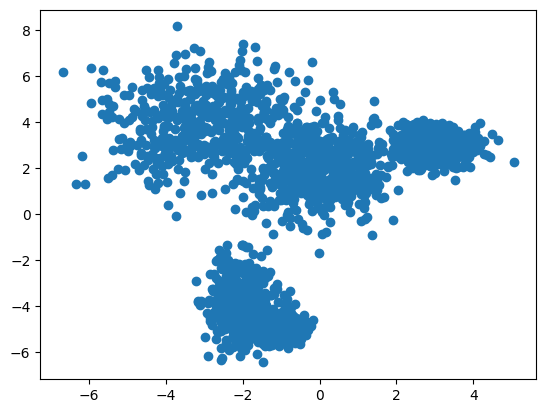

In [6]:
x_values = _data['x'].to_numpy()
y_values = _data['y'].to_numpy()

plt.scatter(x_values, y_values)
plt.show()

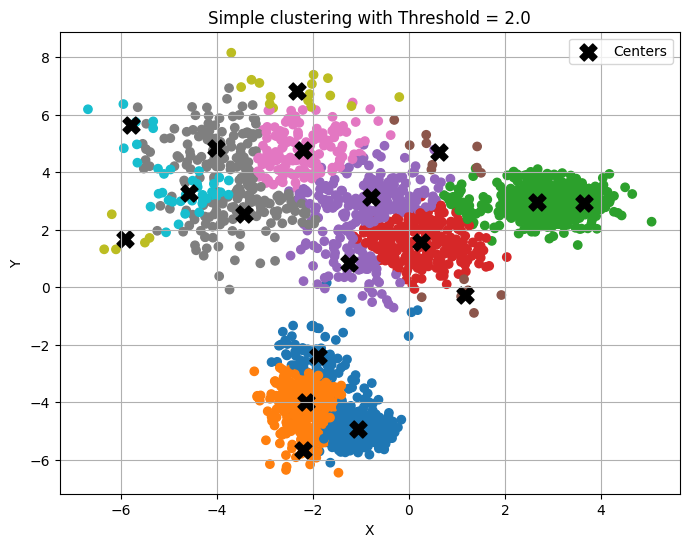

Number of clusters found: 18


In [18]:
def threshold_clustering(data, threshold):
    cluster_centers = [data[0]]
    cluster_assignments = np.zeros(len(data), dtype=int)

    for idx in range(1, len(data)):
        distances = np.array([np.linalg.norm(data[idx] - center) for center in cluster_centers])
        nearest_cluster = np.argmin(distances)

        if distances[nearest_cluster] > threshold:
            cluster_centers.append(data[idx])
            cluster_assignments[idx] = len(cluster_centers) - 1
        else:
            cluster_assignments[idx] = nearest_cluster

    # Обчислюємо нові центри як середні значення точок у кожному кластері
    final_centers = []
    for i in range(len(cluster_centers)):
        points_in_cluster = data[cluster_assignments == i]
        mean_center = np.mean(points_in_cluster, axis=0)
        final_centers.append(mean_center)

    return cluster_assignments, np.array(final_centers)

# Приклад використання
T = 2.0
X = np.column_stack((x_values, y_values))
assigned_labels, cluster_centers = threshold_clustering(X, T)

plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=assigned_labels, cmap='tab10')
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], marker='X', c='black', s=150, label='Centers')
plt.title(f'Simple clustering with Threshold = {T}')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.legend()
plt.show()

print("Number of clusters found:", len(np.unique(assigned_labels)))


In [8]:
k = 3

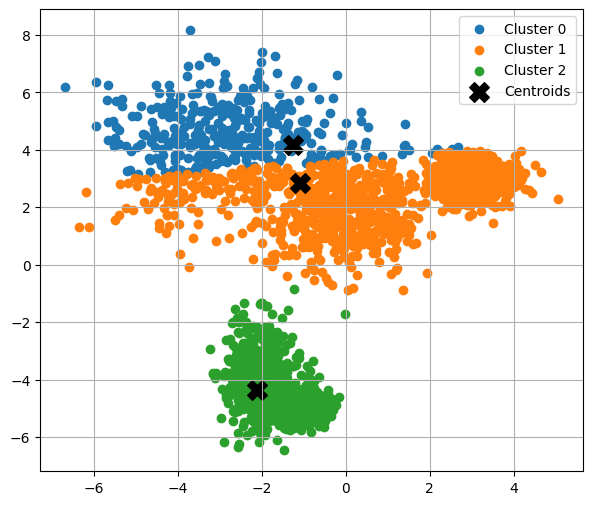

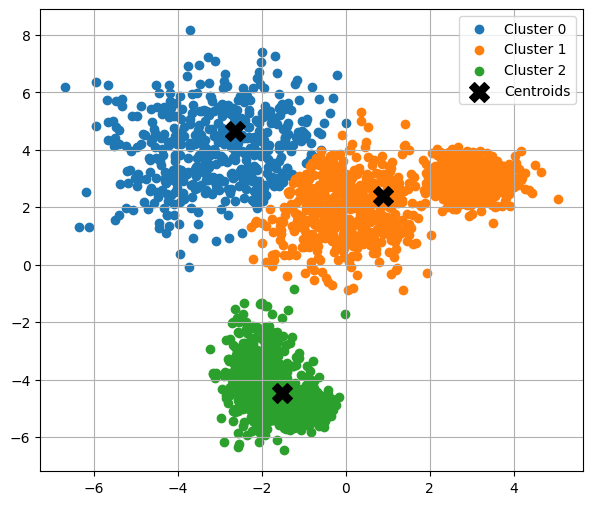

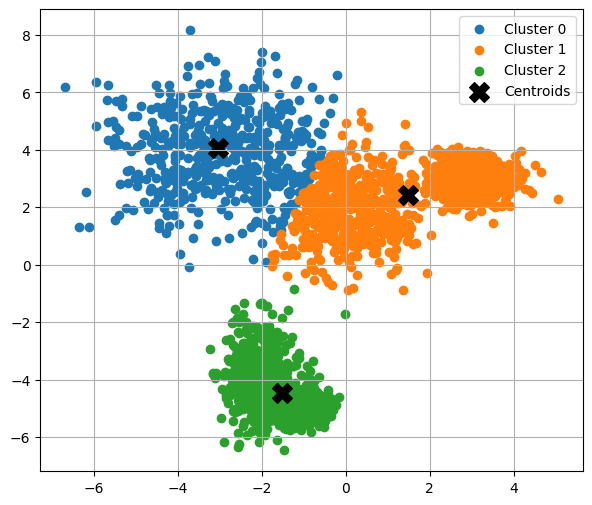

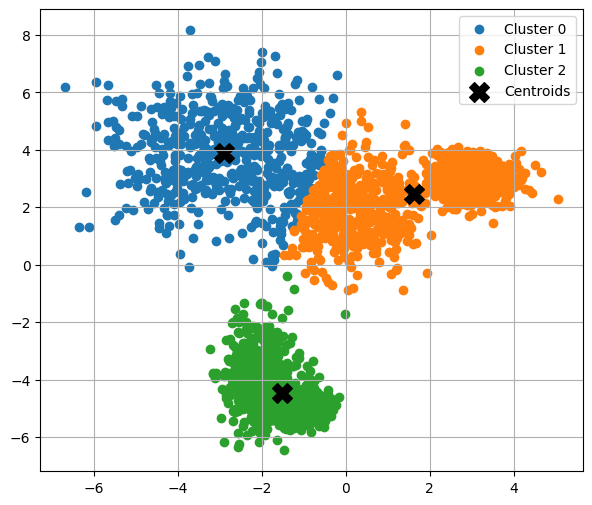

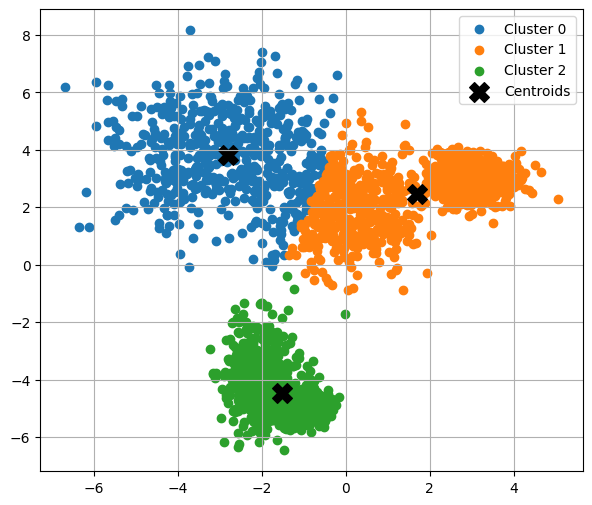

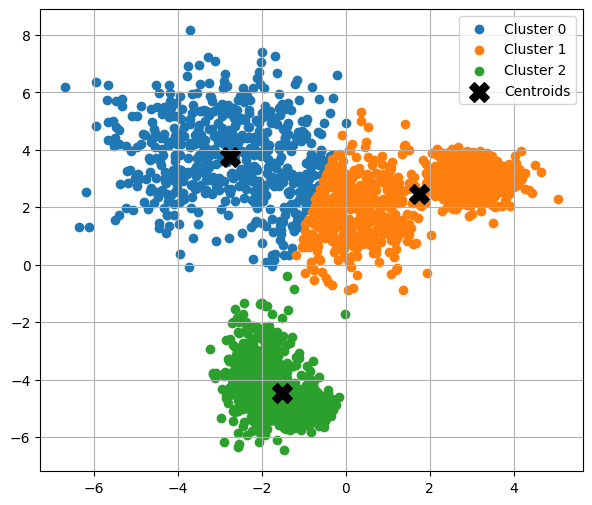

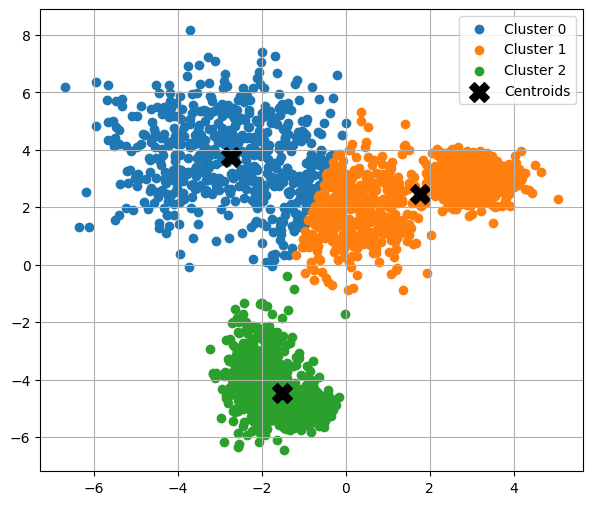

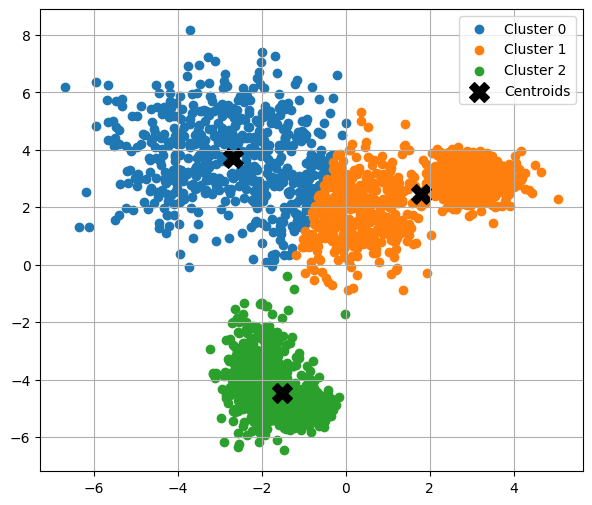

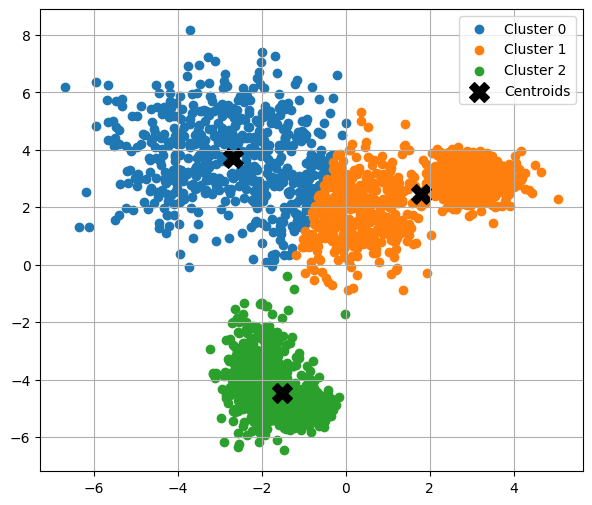

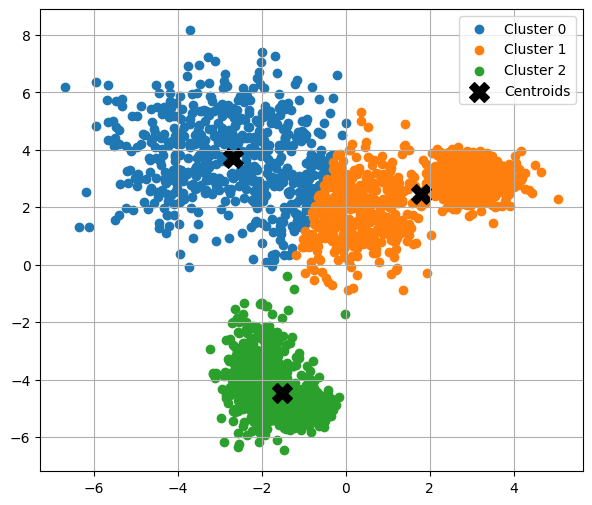

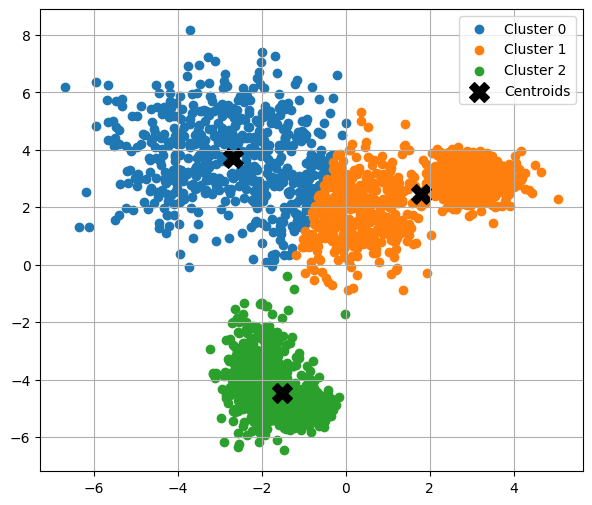

Final center of cluster 0: [-2.68342458  3.72185363]
Final center of cluster 1: [1.7918933  2.46866469]
Final center of cluster 2: [-1.51435405 -4.45005804]


In [16]:
def euclidean(p1, p2):
    return np.linalg.norm(p1 - p2)

def initialize_centroids(data, num_clusters):
    np.random.seed(42)
    indices = np.random.choice(len(data), num_clusters, replace=False)
    centroids = data[indices]
    return centroids

def assign_to_nearest(data, centroids):
    assignments = []
    for point in data:
        distances = [euclidean(point, center) for center in centroids]
        closest_index = np.argmin(distances)
        assignments.append(closest_index)
    return np.array(assignments)

def recalculate_centroids(data, assignments, k):
    new_centroids = []
    for cluster_idx in range(k):
        cluster_points = data[assignments == cluster_idx]
        if len(cluster_points) > 0:
            new_center = cluster_points.mean(axis=0)
        else:
            new_center = data[np.random.randint(0, len(data))]
        new_centroids.append(new_center)
    return np.array(new_centroids)

def draw_clusters(data, centroids, assignments):
    plt.figure(figsize=(7, 6))
    plt.grid(True)
    for i in np.unique(assignments):
        points = data[assignments == i]
        plt.scatter(points[:, 0], points[:, 1], label=f"Cluster {i}")
    plt.scatter(centroids[:, 0], centroids[:, 1], marker='X', s=200, color='black', label='Centroids')
    plt.legend()
    plt.show()

# Дані
points = np.column_stack((x_values, y_values))
k = 3

# Початкова ініціалізація
centroids = initialize_centroids(points, k)

# Основний цикл K-середніх
for iteration in range(10):
    cluster_labels = assign_to_nearest(points, centroids)
    draw_clusters(points, centroids, cluster_labels)
    centroids = recalculate_centroids(points, cluster_labels, k)

# Підсумкова візуалізація
draw_clusters(points, centroids, cluster_labels)

# Вивід фінальних центрів
for idx, center in enumerate(centroids):
    print(f"Final center of cluster {idx}: {center}")

/Users/andriytok/Documents/6_semester/data_analysis/data_Analysis_labs/.venv/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/andriytok/Documents/6_semester/data_analysis/data_Analysis_labs/.venv/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/andriytok/Documents/6_semester/data_analysis/data_Analysis_labs/.venv/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/andriytok/Documents/6_semester/data_analysis/data_Analysis_labs/.venv/lib/python3.13/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: divide by zero encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/Users/andriytok/Documents/6_semester/data_analysis/data_Analysis_labs/.venv/lib/python3.13/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: overf

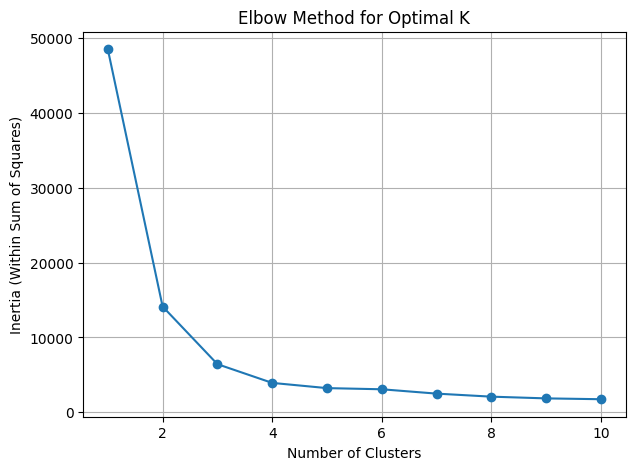

/Users/andriytok/Documents/6_semester/data_analysis/data_Analysis_labs/.venv/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/andriytok/Documents/6_semester/data_analysis/data_Analysis_labs/.venv/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/andriytok/Documents/6_semester/data_analysis/data_Analysis_labs/.venv/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/andriytok/Documents/6_semester/data_analysis/data_Analysis_labs/.venv/lib/python3.13/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: divide by zero encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/Users/andriytok/Documents/6_semester/data_analysis/data_Analysis_labs/.venv/lib/python3.13/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: overf

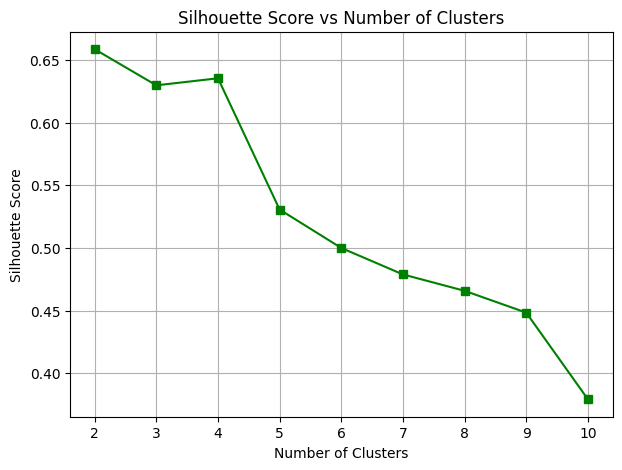

/Users/andriytok/Documents/6_semester/data_analysis/data_Analysis_labs/.venv/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/andriytok/Documents/6_semester/data_analysis/data_Analysis_labs/.venv/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/andriytok/Documents/6_semester/data_analysis/data_Analysis_labs/.venv/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/andriytok/Documents/6_semester/data_analysis/data_Analysis_labs/.venv/lib/python3.13/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: divide by zero encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/Users/andriytok/Documents/6_semester/data_analysis/data_Analysis_labs/.venv/lib/python3.13/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: overf

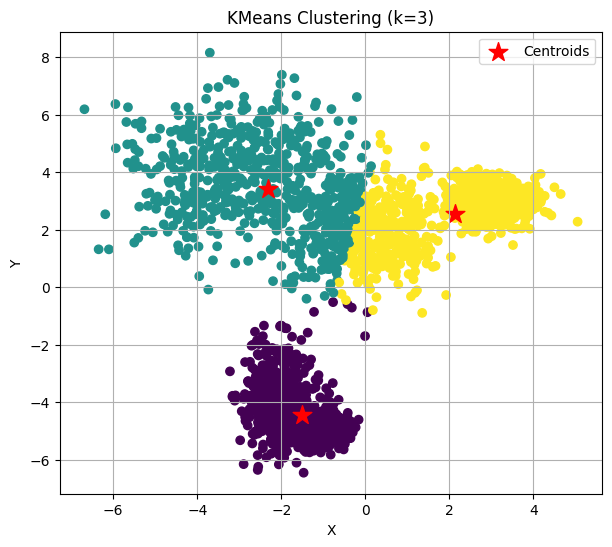

In [19]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Пошук оптимальної кількості кластерів за інерцією
distortions = []
cluster_range = range(1, 11)
for k in cluster_range:
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(_data)
    distortions.append(model.inertia_)

plt.figure(figsize=(7, 5))
plt.plot(cluster_range, distortions, marker='o')
plt.title("Elbow Method for Optimal K")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia (Within Sum of Squares)")
plt.grid(True)
plt.show()

# Пошук за допомогою оцінки силуету
sil_scores = []
cluster_range = range(2, 11)
for k in cluster_range:
    model = KMeans(n_clusters=k, random_state=42)
    labels = model.fit_predict(_data)
    score = silhouette_score(_data, labels)
    sil_scores.append(score)

plt.figure(figsize=(7, 5))
plt.plot(cluster_range, sil_scores, marker='s', color='green')
plt.title("Silhouette Score vs Number of Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.show()

# Остаточна кластеризація при k=3
optimal_k = 3
final_model = KMeans(n_clusters=optimal_k, random_state=42)
final_labels = final_model.fit_predict(_data)
final_centers = final_model.cluster_centers_

# Візуалізація точок з центрами
plt.figure(figsize=(7, 6))
plt.scatter(x_values, y_values, c=final_labels, cmap='viridis')
plt.scatter(final_centers[:, 0], final_centers[:, 1], marker='*', s=200, c='red', label='Centroids')
plt.title(f'KMeans Clustering (k={optimal_k})')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.legend()
plt.show()
